**Problem Identification**

* The client has given a dataset and they want you to analyze the data and to segment it based on users spending score.
* You have to predict which customers belong to which group and who are the target customers, so that it make sense for marketing team and they plan their strategy accordingly.

**Approach**

* Reading and understanding the data, dealing with null values.
* Finding the insights from the data then visualization and drawing conclusion about age, annual income and spending score.
* Building a model using K-Means clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,Male,19,15,39.0,New York
1,2,Male,21,15,81.0,Seattle
2,3,Female,20,16,6.0,Los Angeles.
3,4,Female,23,16,77.0,Chicago.
4,5,Female,31,17,40.0,Houston.
...,...,...,...,...,...,...
1175,1176,Female,47,88,73.0,Chicago.
1176,1177,Male,48,88,10.0,Houston.
1177,1178,Male,49,88,72.0,Phoenix.
1178,1179,Male,50,93,5.0,Philadelphia.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1180 non-null   int64  
 1   Gender                  1180 non-null   object 
 2   Age                     1180 non-null   int64  
 3   Annual Income (k$)      1180 non-null   int64  
 4   Spending Score (1-100)  942 non-null    float64
 5   City                    1180 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.4+ KB


In [4]:
df['Spending Score (1-100)'].isnull().sum()

238

In [5]:
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean())
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype(dtype='int32')

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'City'],
      dtype='object')

In [7]:
del df['CustomerID']

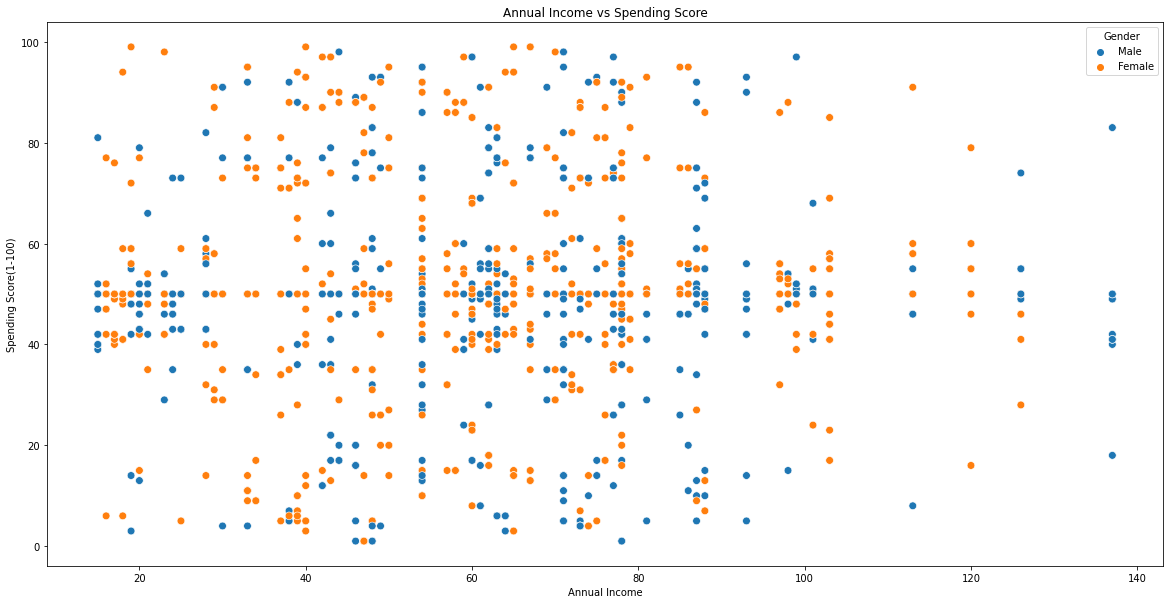

In [8]:
plt.rcParams['figure.figsize'] = (20,10)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=df,s=60)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

* From this scatterplot, we can see that there are some customer who have less income but spending more while there are some customer who have high income but spending less.

* As a result, there is no relation forming between income and spending score.

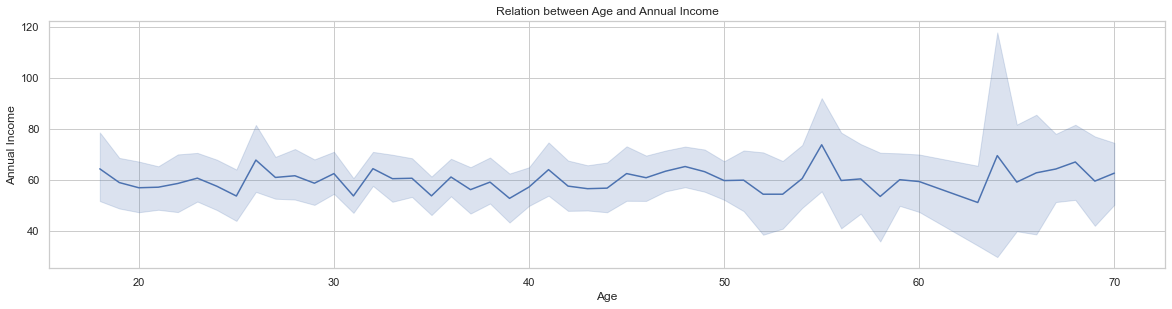

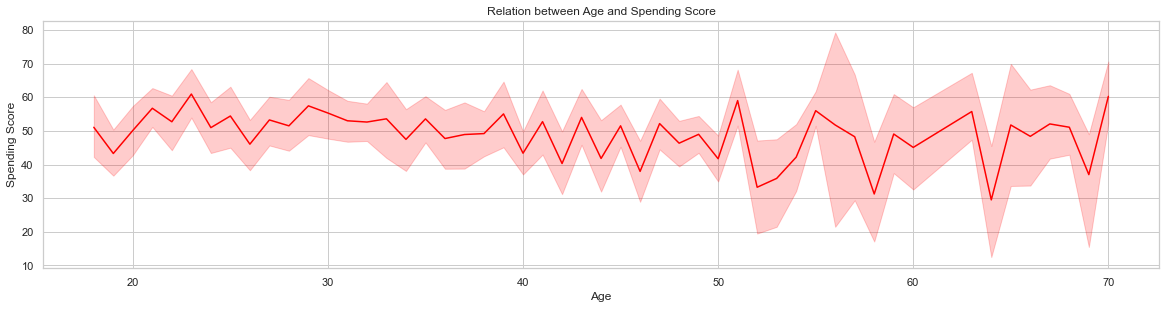

In [58]:
plt.subplot(2,1,1)
sns.lineplot(x='Age',y='Annual Income (k$)',data=df)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Relation between Age and Annual Income')
plt.show()

plt.subplot(2,1,2)
sns.lineplot(x='Age',y='Spending Score (1-100)',color='red',data=df)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Relation between Age and Spending Score')
plt.show()

In [10]:
df['Gender'].value_counts()

Female    659
Male      521
Name: Gender, dtype: int64

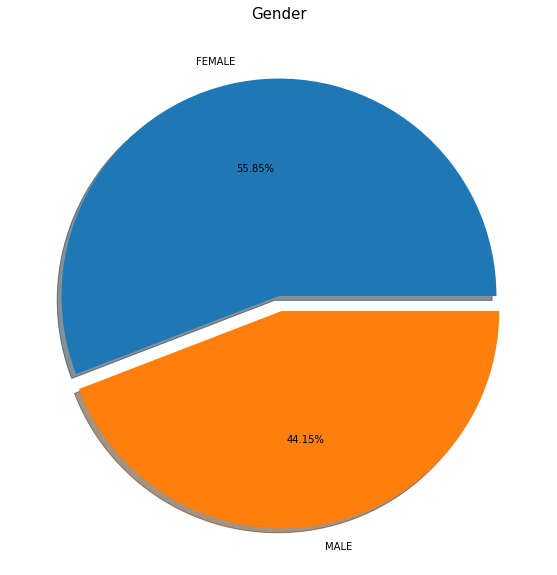

In [11]:
plt.pie(x=df['Gender'].value_counts(),explode = [0,0.07],labels=['FEMALE','MALE'],shadow=True,autopct='%.2f%%')
plt.title('Gender',fontsize = 15)
plt.show()

* From the above pie chart we can see that female customers are slightly higher than male customers.From this we can predict that the mall is selling more products which are mostly used by female like beauty products, household products etc.

In [12]:
df1 = df.groupby('Gender').mean().reset_index()
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,37.836115,58.320182,51.262519
1,Male,37.570058,61.506718,48.679463


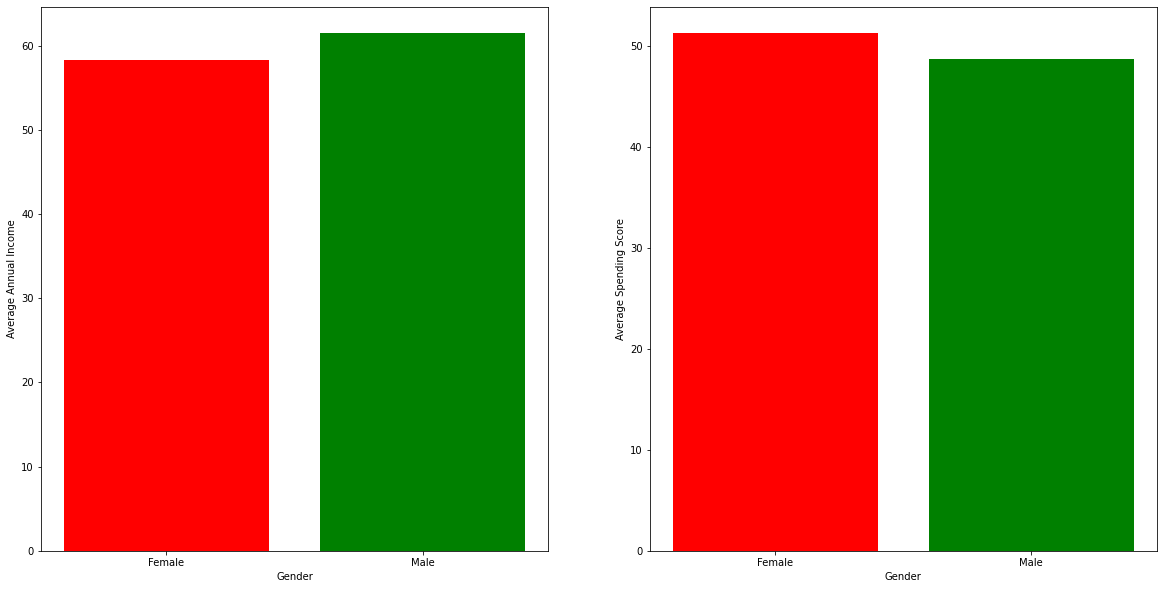

In [13]:
plt.subplot(1,2,1)
plt.bar(x=['Female','Male'],height=df1['Annual Income (k$)'],color=['Red','Green'])
plt.xlabel('Gender')
plt.ylabel('Average Annual Income')
plt.subplot(1,2,2)
plt.bar(x=['Female','Male'],height=df1['Spending Score (1-100)'],color=['Red','Green'])
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.show()

* Average annual income of male customers is greater than that of female customers but when it comes to spending the average spending score of female customers is slightly greater than male customers.

In [14]:
age = df['Age'].value_counts().sort_index().index
print(age)

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69,
            70],
           dtype='int64')


In [15]:
# age18_19 = len(df.Age[(df.Age <= 19) & (df.Age >= 18)])
# age20_29 = len(df.Age[(df.Age <= 29) & (df.Age >= 20)])
# age30_39 = len(df.Age[(df.Age <= 39) & (df.Age >= 30)])
# age40_49 = len(df.Age[(df.Age <= 49) & (df.Age >= 40)])
# age50_59 = len(df.Age[(df.Age <= 59) & (df.Age >= 50)])
# age60_69 = len(df.Age[(df.Age <= 69) & (df.Age >= 60)])
# age70_above = len(df.Age[df.Age >= 70])

# x = ['18-19','20-29','30-39','40-49','50-59','60-69','70-above']
# y = [age18_19,age20_29,age30_39,age40_49,age50_59,age60_69,age70_above]

# sns.set_theme(style='whitegrid')
# plt.bar(x=x,height=y,color=['red','green','blue','yellow','orange','black','brown'])
# plt.xlabel('Ages')
# plt.ylabel('No. of customers')
# plt.title('Distribution of customers according to age')
# plt.show()

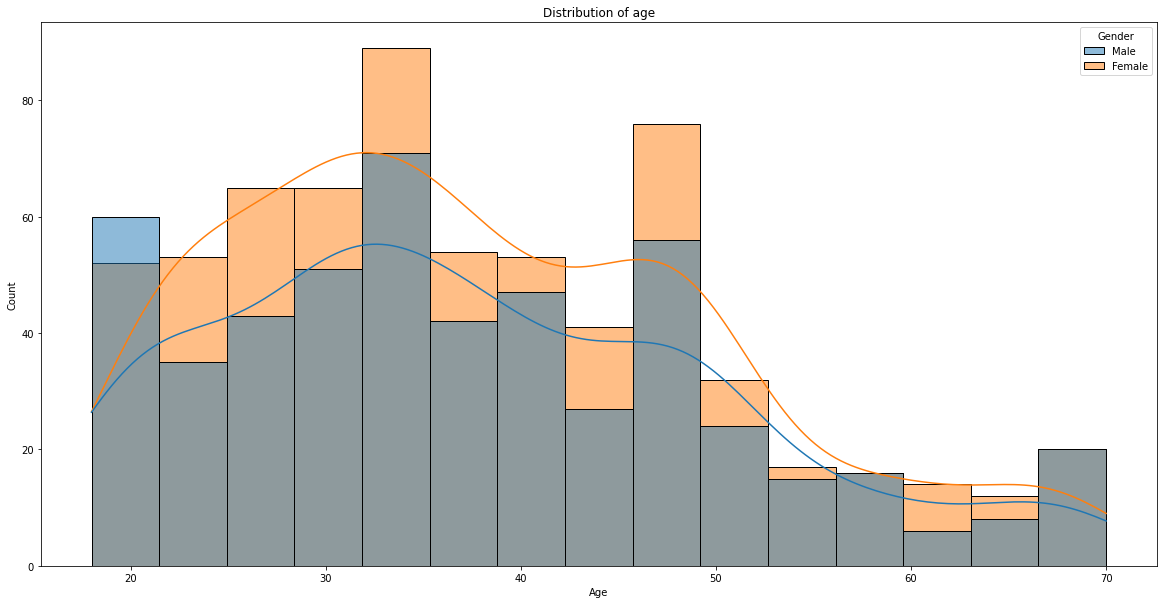

In [16]:
sns.histplot(data=df,x='Age',hue='Gender',kde=True)
plt.title('Distribution of age')
plt.show()

* From the above histogram we can see that most of the customers are from age 20 to 50

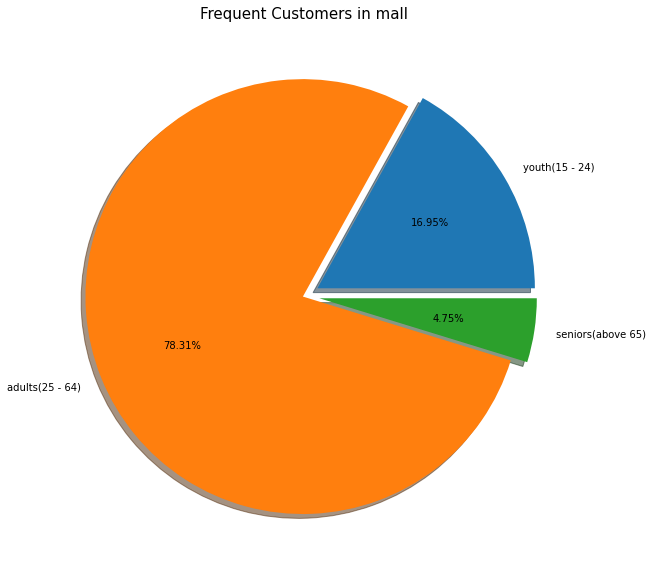

In [17]:
children = df.Age[(df.Age > 5) & (df.Age <= 14)]
youth = df.Age[(df.Age >= 15) & (df.Age <= 24)]
adults = df.Age[(df.Age >= 25) & (df.Age <= 64)]
seniors = df.Age[df.Age>= 65]

x = ['children(5 - 14)','youth(15 - 24)','adults(25 - 64)','seniors(above 65)']
y = [len(children),len(youth),len(adults),len(seniors)]

plt.pie(x=y[1:],labels=x[1:],explode=[0.07,0.007,0.07],shadow=True,autopct='%.2f%%')
plt.title('Frequent Customers in mall',fontsize = 15)
plt.show()

* I have categorized age into 4 different categories i.e. Children, Youth, Adult, Seniors.
* From the above pie chart, we can get clear understanding that adult people whose age ranges from 25 to 64 are the most frequent customers while senior people are the less frequent customers.
* Youth people are coming in the mall but not that frequent.

In [18]:
def age_label(age):
    if age >=5 and age <=14:
        return 'Children'
    if age >=15 and age <=24:
        return 'Youth'
    if age >= 25 and age <= 64:
        return 'Adult'
    if age >= 65:
        return 'Senior'

df['Age Label'] = df['Age'].apply(age_label)

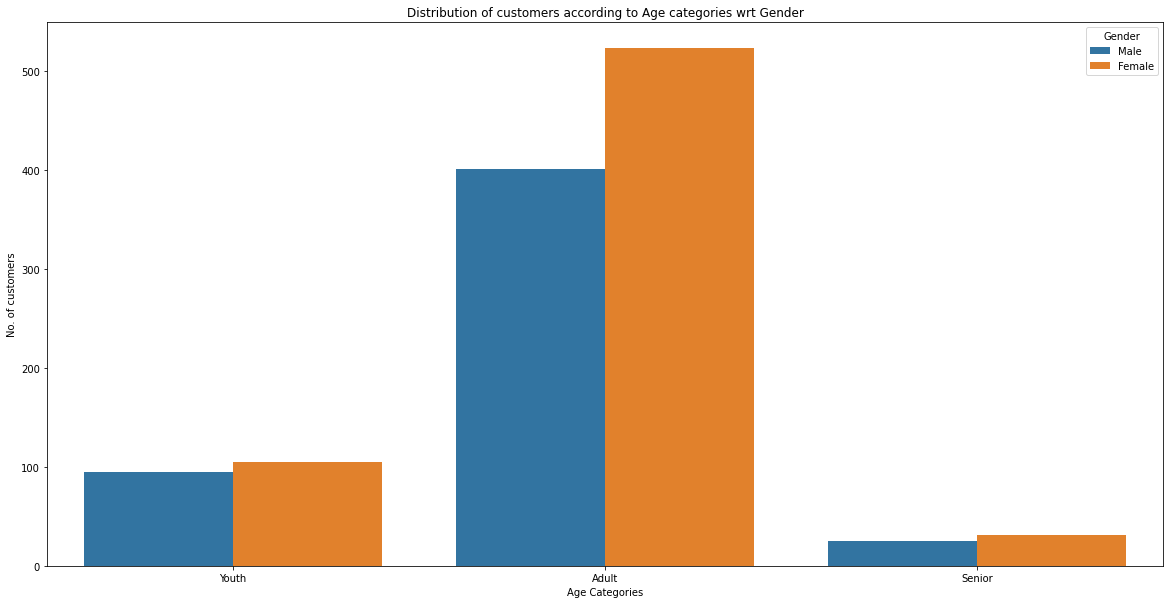

In [19]:
sns.countplot(x='Age Label',hue='Gender',data=df)
plt.xlabel('Age Categories')
plt.ylabel('No. of customers')
plt.title('Distribution of customers according to Age categories wrt Gender')
plt.show()

* From the above bar graph, we can observe that in all three age categories female customers are more than male customers and adult female customers are the most frequent customers

In [20]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

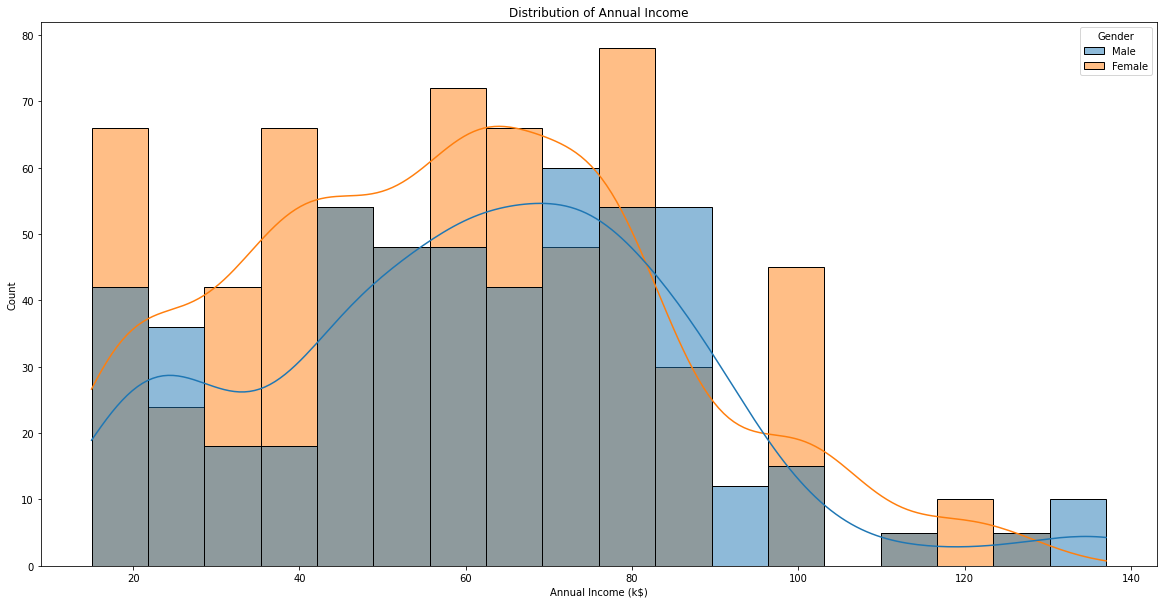

In [21]:
sns.histplot(data=df,x='Annual Income (k$)',hue='Gender',kde=True)
plt.title('Distribution of Annual Income')
plt.show()

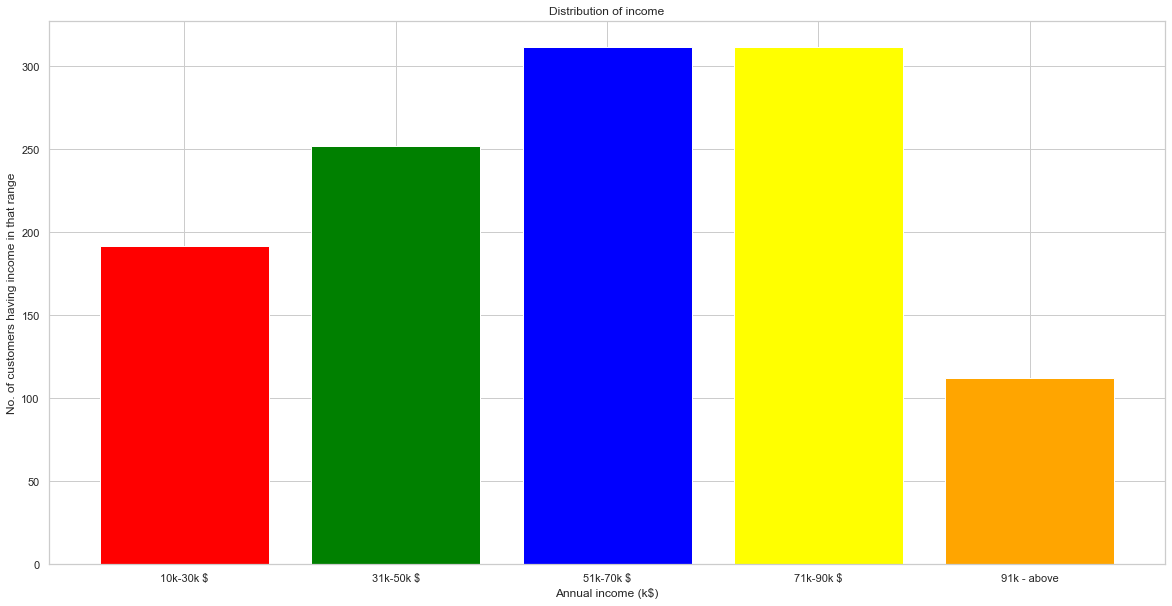

In [22]:
income10_30 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 10) & (df['Annual Income (k$)'] <= 30)])
income31_50 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 30) & (df['Annual Income (k$)'] <= 50)])
income51_70 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 50) & (df['Annual Income (k$)'] <= 70)])
income71_90 = len(df['Annual Income (k$)'][(df['Annual Income (k$)'] > 70) & (df['Annual Income (k$)'] <= 90)])
income91_above = len(df['Annual Income (k$)'][df['Annual Income (k$)'] > 90])

x = ['10k-30k $','31k-50k $','51k-70k $','71k-90k $','91k - above']
y = [income10_30,income31_50,income51_70,income71_90,income91_above]

sns.set_theme(style='whitegrid')
plt.bar(x=x,height=y,color=['red','green','blue','yellow','orange','black','brown'])
plt.xlabel('Annual income (k$)')
plt.ylabel('No. of customers having income in that range')
plt.title('Distribution of income')
plt.show()

* From the above graph, we get an idea about distribution of annual income of the customers. Most of the customers are having an income range lying between 31,000 dollar to 90,000 dollar while very few customers are having annual income above
90,000 dollar

In [23]:
age = df['Spending Score (1-100)'].value_counts().sort_index().index
print(age)

Int64Index([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 39, 40, 41, 42,
            43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
            60, 61, 63, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81,
            82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99],
           dtype='int64')


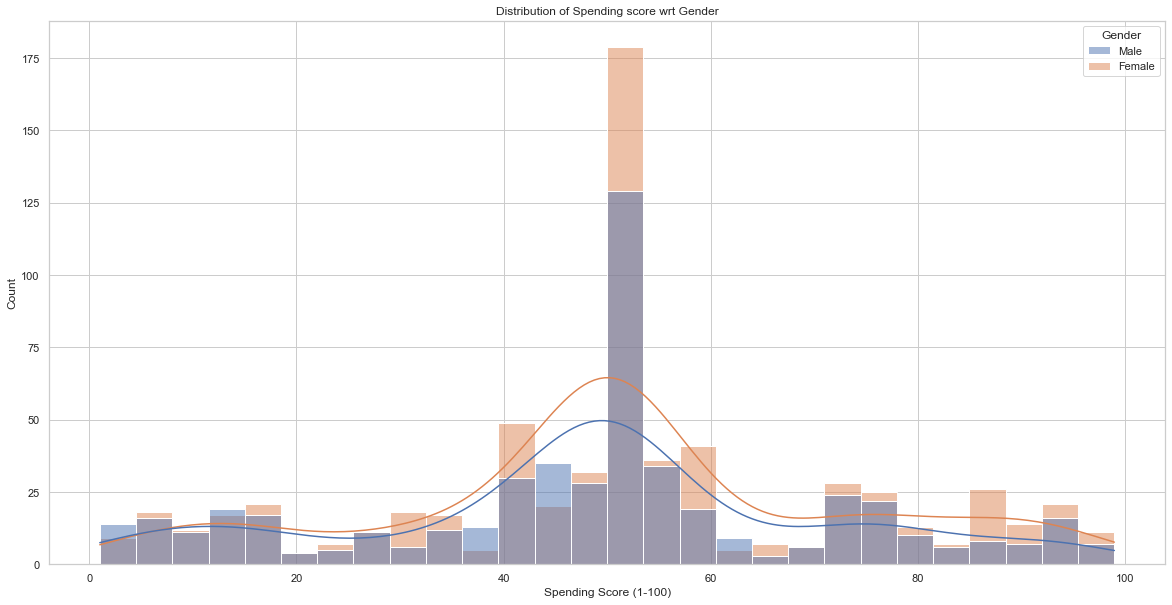

In [24]:
sns.histplot(data=df,x='Spending Score (1-100)',hue='Gender',kde=True)
plt.title('Distribution of Spending score wrt Gender')
plt.show()

* From this graph, we can observe that most of the customers are having a spending score between 41 and 60. Also there are some customers whose spending scores are greater than 80.

In [25]:
# sScore1_20  = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)])
# sScore21_40 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)])
# sScore41_60 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)])
# sScore61_80 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)])
# sScore81_100 = len(df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)])

# x = ['1 - 20','21 - 40','41 - 60','61 - 80','81 - 100']
# y = [sScore1_20,sScore21_40,sScore41_60,sScore61_80,sScore81_100]

# sns.set_theme(style='whitegrid')
# plt.bar(x=x,height=y,color=['red','green','blue','yellow','orange','black','brown'])
# plt.xlabel('Spending Score')
# plt.ylabel('No. of customers having spending score in that range')
# plt.title('Distribution of Spending Score')
# plt.show()

In [64]:
df['City'].value_counts()

array([135, 135, 135, 135, 135, 135, 134, 100,  68,  68], dtype=int64)

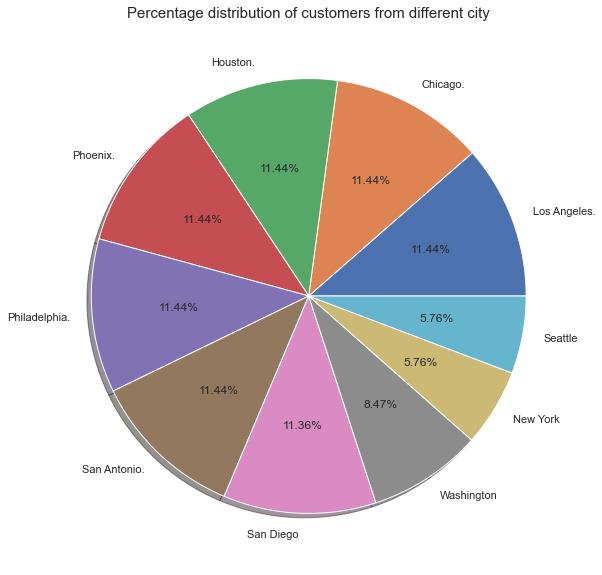

In [71]:
x = df['City'].value_counts().index.to_list()
y = df['City'].value_counts().values

plt.pie(x=y,labels=x,shadow=True,autopct='%.2f%%')
plt.title('Percentage distribution of customers from different city',fontsize = 15)
plt.show()

* Most of the customers are from Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego and from Washington. Maybe the company has many malls in these city.
* Very few customers are from New York and Seattle.

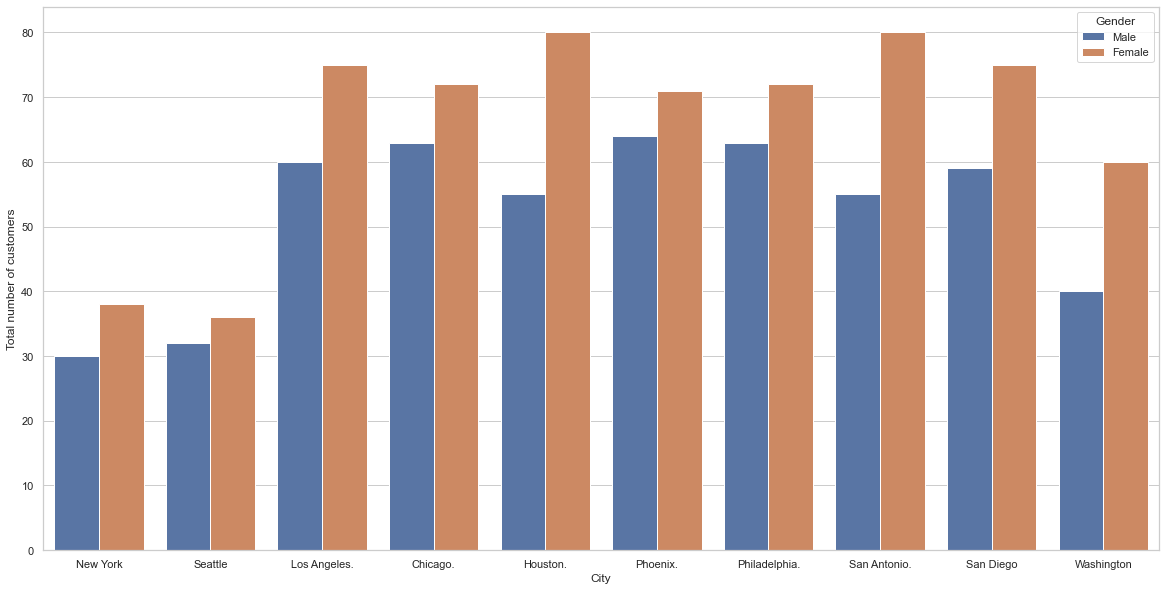

In [27]:
sns.countplot(x='City',hue='Gender',data=df)
plt.xlabel('City')
plt.ylabel('Total number of customers')
plt.show()

In [28]:
average_df = df.groupby("City").mean().reset_index()
average_df

,City,Age,Annual Income (k$),Spending Score (1-100)
0,Chicago.,38.318519,60.177778,49.903704
1,Houston.,37.185185,60.740741,48.992593
2,Los Angeles.,38.711111,60.325926,49.400000
3,New York,37.779412,59.044118,50.382353
4,Philadelphia.,37.570370,59.007407,50.133333
5,Phoenix.,38.066667,59.459259,50.666667
6,San Antonio.,38.155556,59.711111,50.037037
7,San Diego,36.126866,59.111940,50.044776
8,Seattle,36.161765,59.485294,51.088235
9,Washington,38.580000,59.750000,51.550000


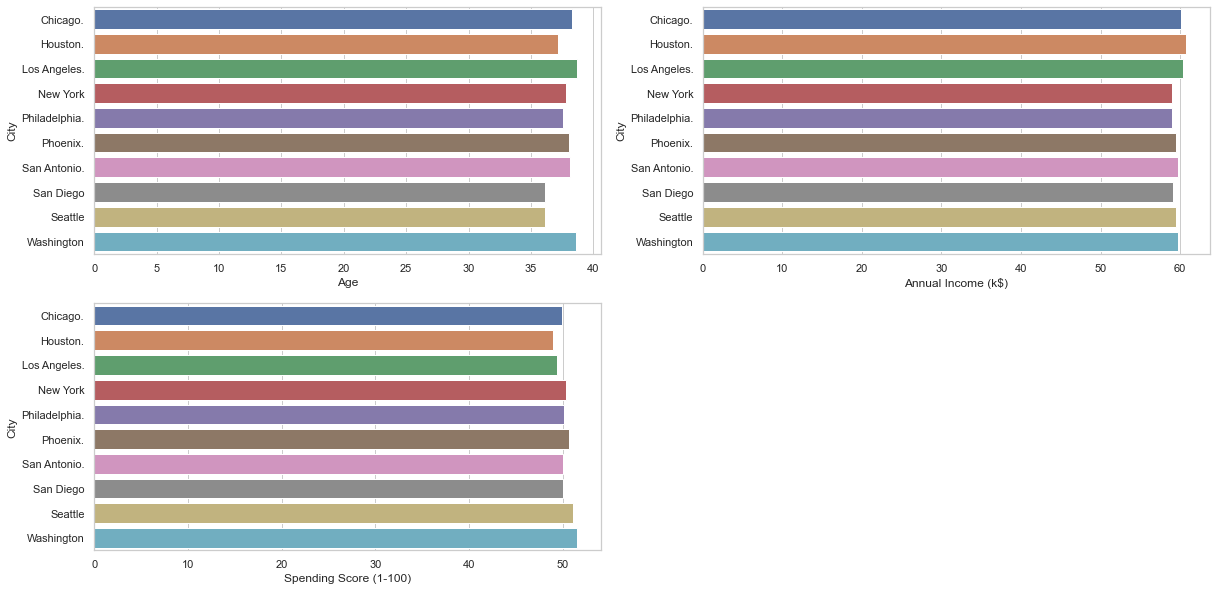

In [29]:
for i,j in enumerate(average_df.columns[1:]):
    plt.subplot(2,2,i+1)
    sns.barplot(y='City',x=j,data=average_df)

### Training the ML model

In [30]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [31]:
def customer_category(score):
    if score < 20:
        return 'Miser'
    elif score > 20 and score < 40:
        return 'Careful'
    elif score > 40 and score < 60 and score != 50:
        return 'General'
    elif score > 60 and score < 80:
        return 'Target'
    elif score == 50:
        return 'Centroid'
    else :
        return 'Spendthrift'

In [32]:
df['Customer Category'] = df['Spending Score (1-100)'].apply(customer_category)

In [33]:
new_df = df.drop(columns=['Gender','Age','City'])
new_df

,Annual Income (k$),Spending Score (1-100),Age Label,Customer Category
0,15,39,Youth,Careful
1,15,81,Youth,Spendthrift
2,16,6,Youth,Miser
3,16,77,Youth,Target
4,17,40,Adult,Spendthrift
...,...,...,...,...
1175,88,73,Adult,Target
1176,88,10,Adult,Miser
1177,88,72,Adult,Target
1178,93,5,Adult,Miser


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [36]:
cat_col = ['Age Label','Customer Category']
encoder.fit(new_df[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
encoder_col = list(encoder.get_feature_names_out(cat_col))

In [38]:
encoder_col

['Age Label_Adult',
 'Age Label_Senior',
 'Age Label_Youth',
 'Customer Category_Careful',
 'Customer Category_Centroid',
 'Customer Category_General',
 'Customer Category_Miser',
 'Customer Category_Spendthrift',
 'Customer Category_Target']

In [39]:
new_df[encoder_col] = encoder.transform(new_df[cat_col])

In [40]:
new_df.head()

,Annual Income (k$),Spending Score (1-100),Age Label,Customer Category,Age Label_Adult,Age Label_Senior,Age Label_Youth,Customer Category_Careful,Customer Category_Centroid,Customer Category_General,Customer Category_Miser,Customer Category_Spendthrift,Customer Category_Target
0,15,39,Youth,Careful,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,15,81,Youth,Spendthrift,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16,6,Youth,Miser,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,16,77,Youth,Target,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17,40,Adult,Spendthrift,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
new_df.drop(cat_col,axis=1,inplace=True)

### Age

In [42]:
x = new_df[['Annual Income (k$)','Spending Score (1-100)']]
y = new_df[['Age Label_Adult','Age Label_Senior','Age Label_Youth']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

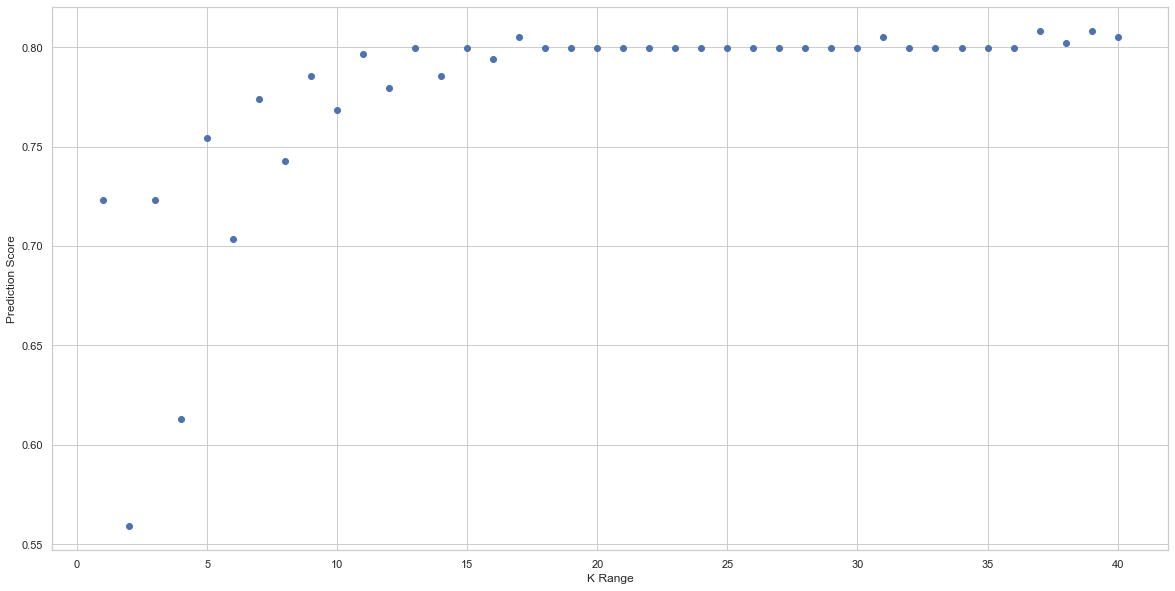

In [46]:
k_range = range(1,41)
score = []

for item in k_range:
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_test,y_test))
    
plt.scatter(k_range,score)
plt.xlabel('K Range')
plt.ylabel('Prediction Score')
plt.show()

In [47]:
kn = KNeighborsClassifier(n_neighbors=21)

In [48]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [49]:
print('Testing accuracy is ',kn.score(x_test,y_test))

Testing accuracy is  0.7994350282485876


In [50]:
print('Training accuracy is ',kn.score(x_train,y_train))

Training accuracy is  0.7566585956416465


### Customer Segmentation

In [51]:
x = new_df[['Annual Income (k$)','Spending Score (1-100)']]
y = new_df[['Customer Category_Careful','Customer Category_Centroid','Customer Category_General','Customer Category_Miser','Customer Category_Spendthrift','Customer Category_Target']]

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

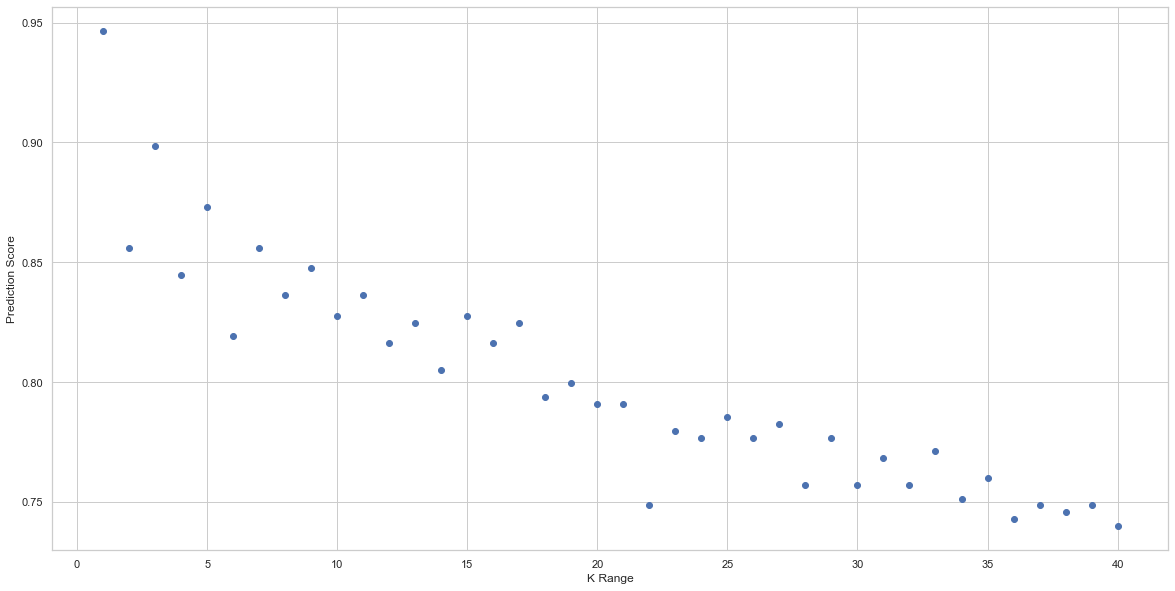

In [53]:
k_range = range(1,41)
score = []

for item in k_range:
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_test,y_test))
    
plt.scatter(k_range,score)
plt.xlabel('K Range')
plt.ylabel('Prediction Score')
plt.show()

In [54]:
kn = KNeighborsClassifier(n_neighbors=3)

In [55]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
print('Training accuracy is ',kn.score(x_train,y_train))
print('Testing accuracy is ',kn.score(x_test,y_test))

Training accuracy is  0.9527845036319612
Testing accuracy is  0.8983050847457628
